Hasil Uji ADF untuk Riau:
Statistik ADF: -1.6053
p-value: 0.4809
------------------------------
Data suhu di Riau adalah Tidak Stasioner.



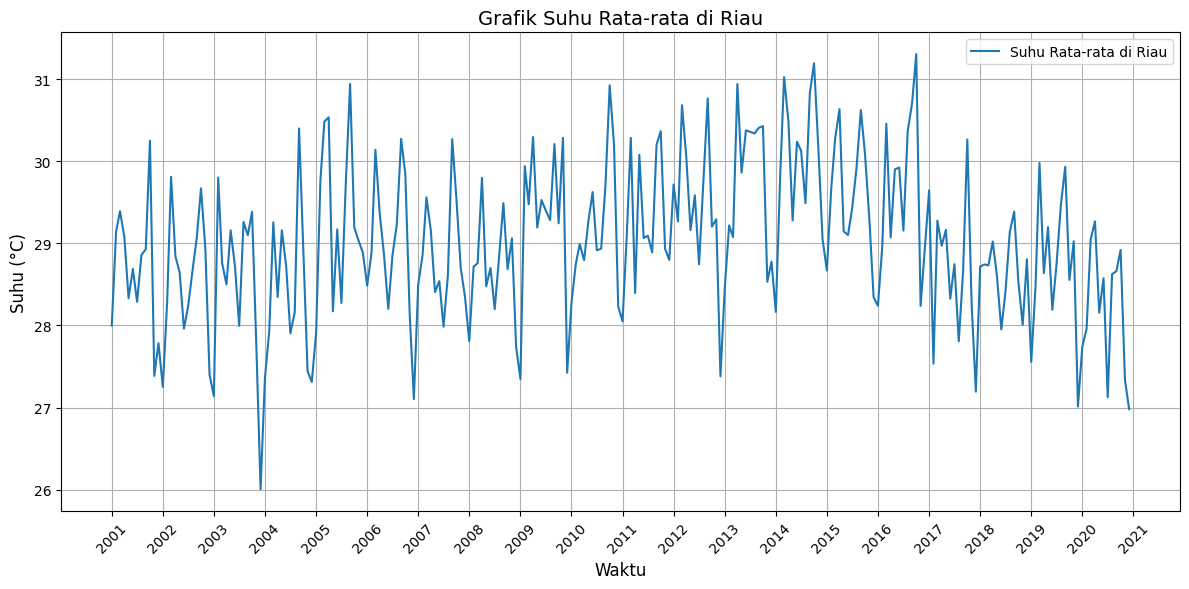

Hasil Uji ADF untuk Bengkalis:
Statistik ADF: -1.6906
p-value: 0.4360
------------------------------
Data suhu di Bengkalis adalah Tidak Stasioner.



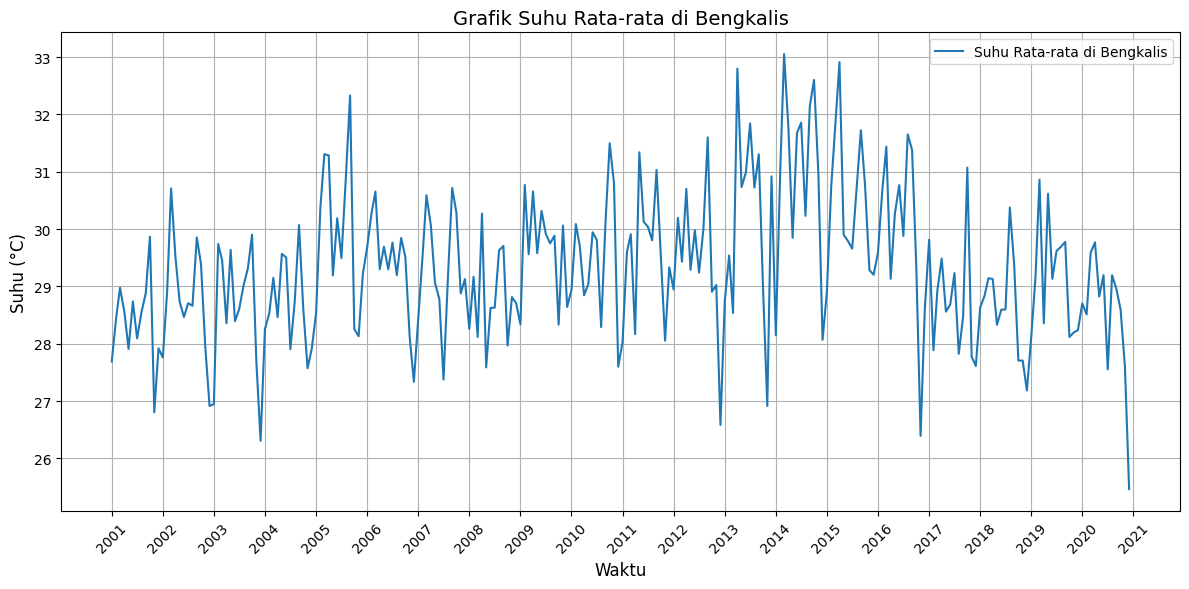

Hasil Uji ADF untuk Indragiri Hilir:
Statistik ADF: -2.1916
p-value: 0.2093
------------------------------
Data suhu di Indragiri Hilir adalah Tidak Stasioner.



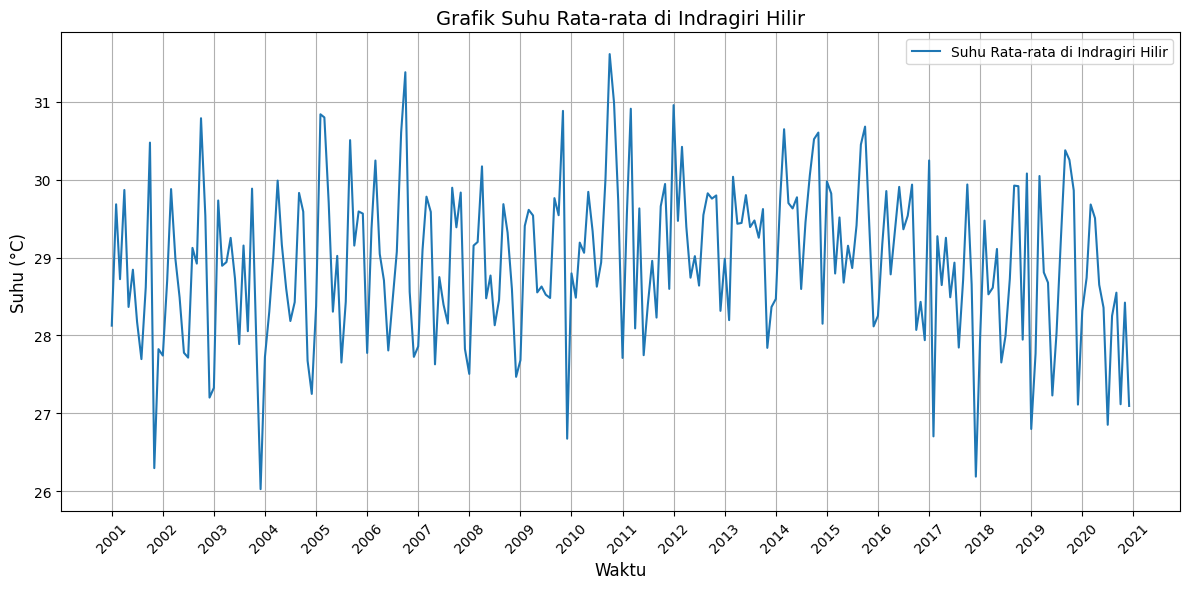

Hasil Uji ADF untuk Indragiri Hulu:
Statistik ADF: -1.5620
p-value: 0.5027
------------------------------
Data suhu di Indragiri Hulu adalah Tidak Stasioner.



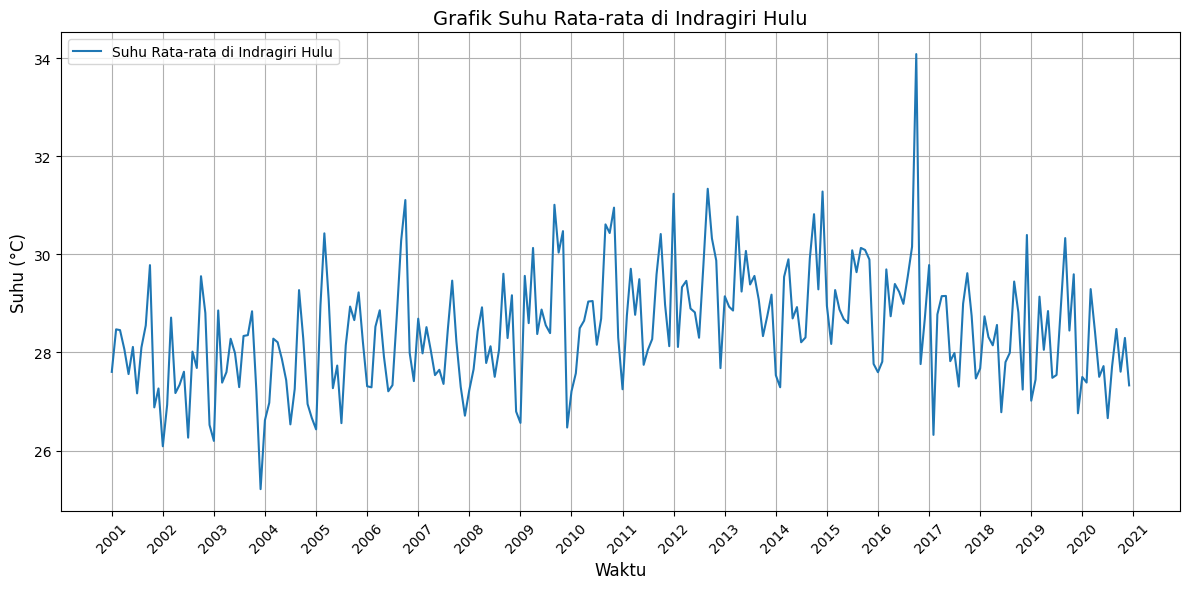

Hasil Uji ADF untuk Kampar:
Statistik ADF: -1.2371
p-value: 0.6574
------------------------------
Data suhu di Kampar adalah Tidak Stasioner.



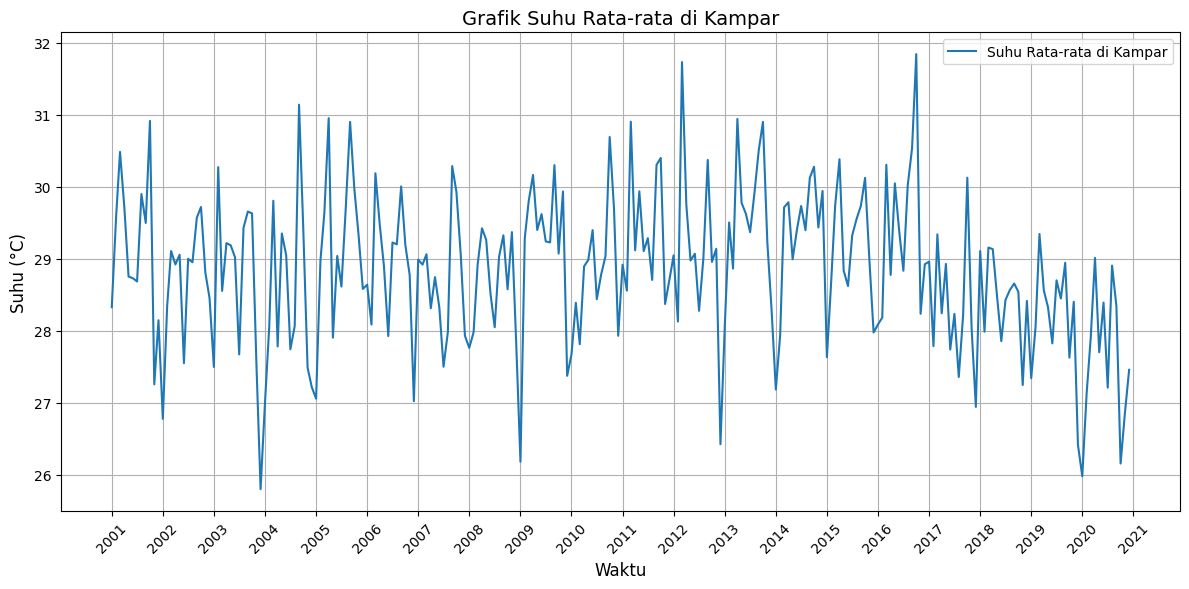

Hasil Uji ADF untuk Kepulauan Meranti:
Statistik ADF: -1.6888
p-value: 0.4369
------------------------------
Data suhu di Kepulauan Meranti adalah Tidak Stasioner.



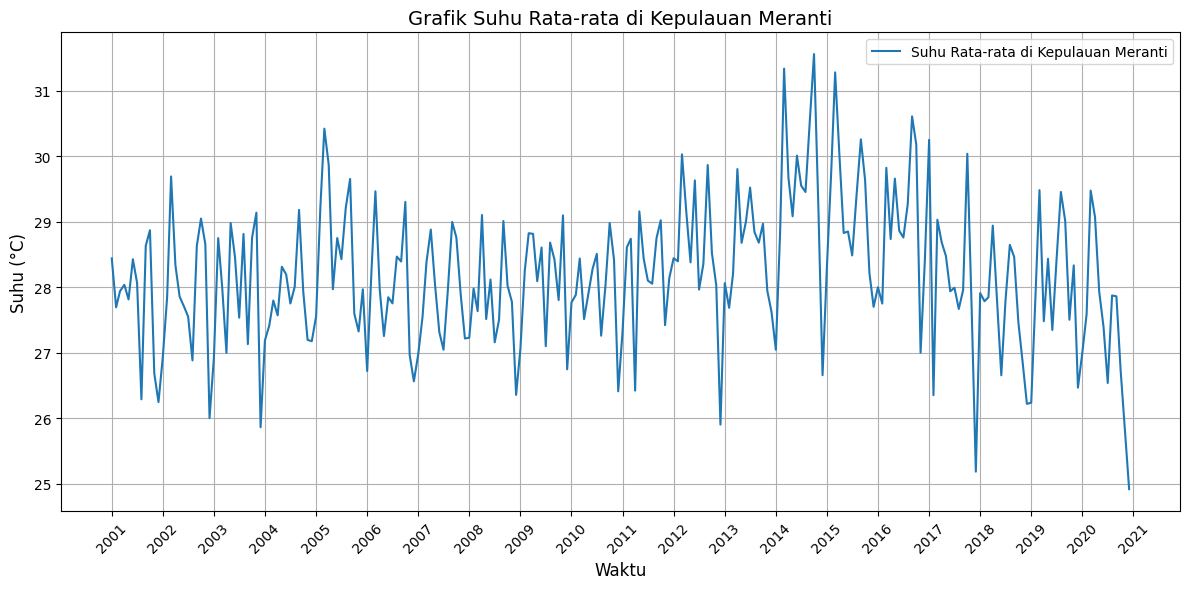

Hasil Uji ADF untuk Kota Dumai:
Statistik ADF: -2.0840
p-value: 0.2510
------------------------------
Data suhu di Kota Dumai adalah Tidak Stasioner.



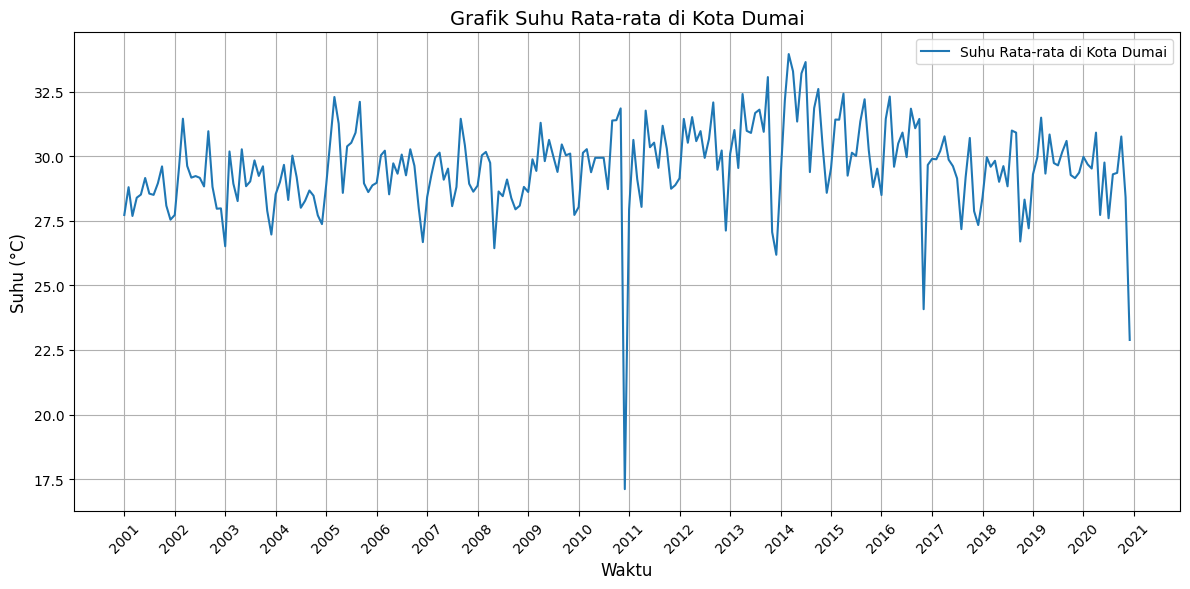

Hasil Uji ADF untuk Kota Pekanbaru:
Statistik ADF: -2.6332
p-value: 0.0863
------------------------------
Data suhu di Kota Pekanbaru adalah Tidak Stasioner.



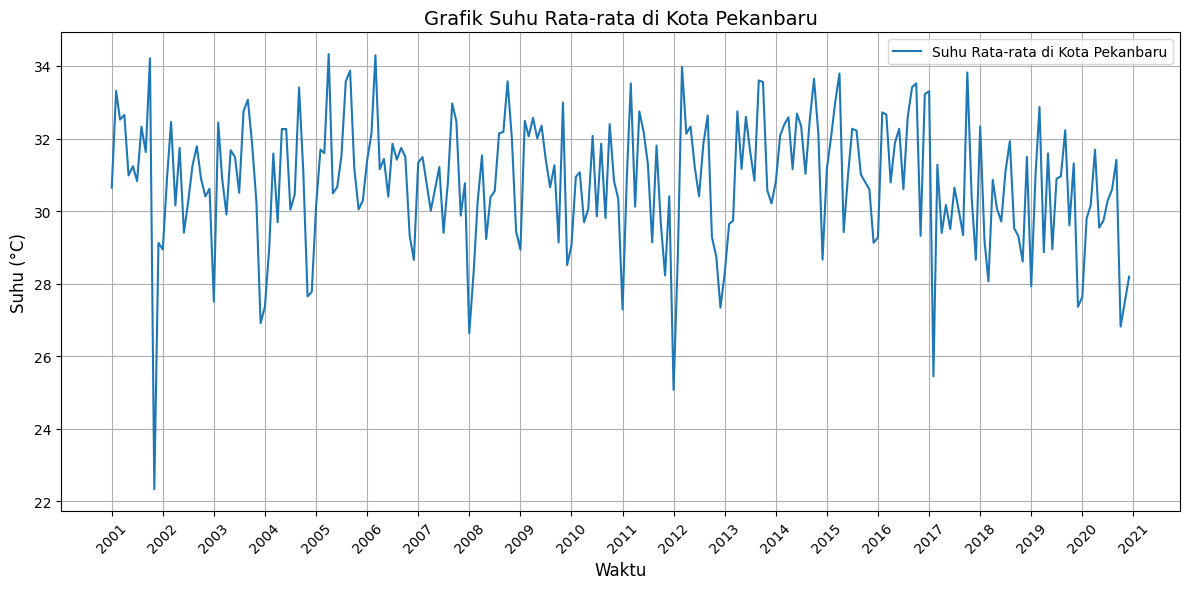

Hasil Uji ADF untuk Kuantan Singingi:
Statistik ADF: -1.6847
p-value: 0.4390
------------------------------
Data suhu di Kuantan Singingi adalah Tidak Stasioner.



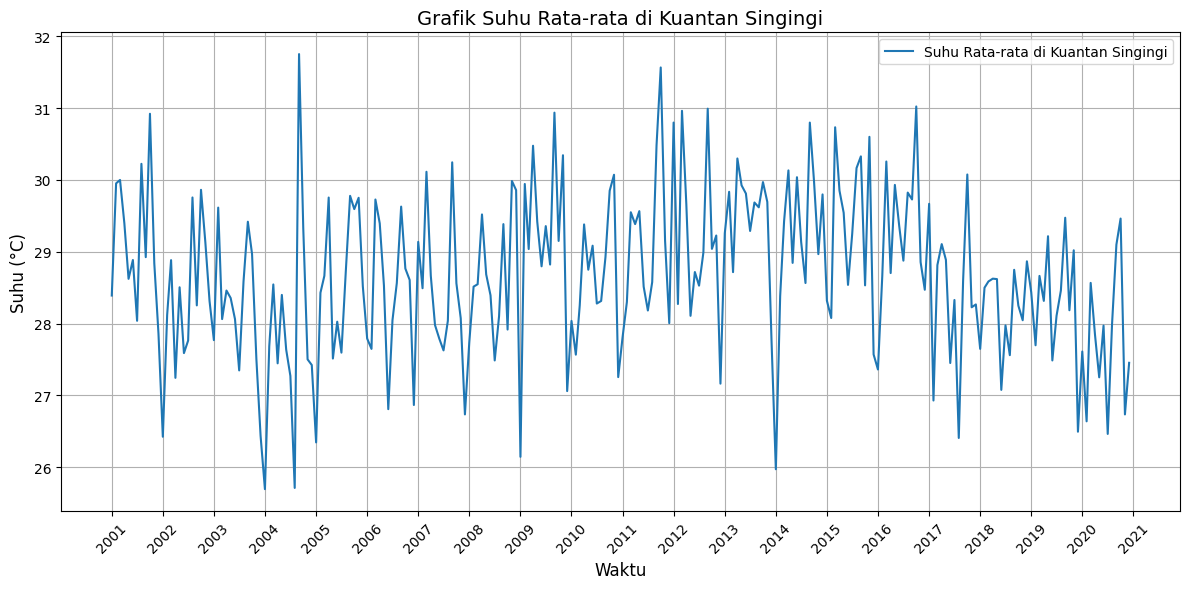

Hasil Uji ADF untuk Pelalawan:
Statistik ADF: -1.9930
p-value: 0.2897
------------------------------
Data suhu di Pelalawan adalah Tidak Stasioner.



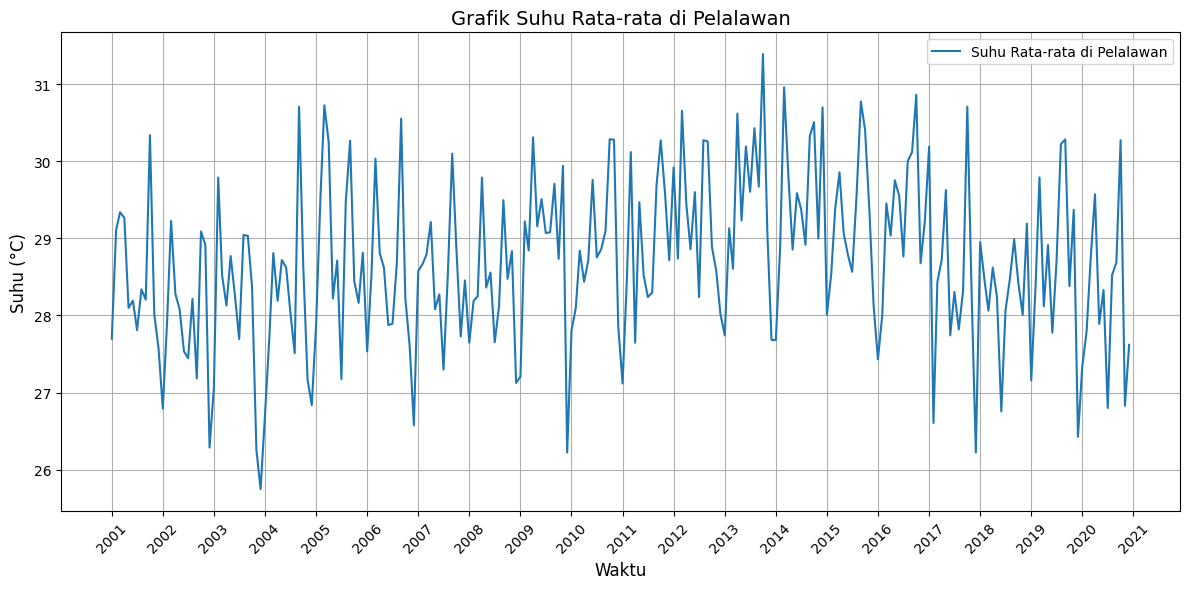

Hasil Uji ADF untuk Rokan Hilir:
Statistik ADF: -1.8547
p-value: 0.3537
------------------------------
Data suhu di Rokan Hilir adalah Tidak Stasioner.



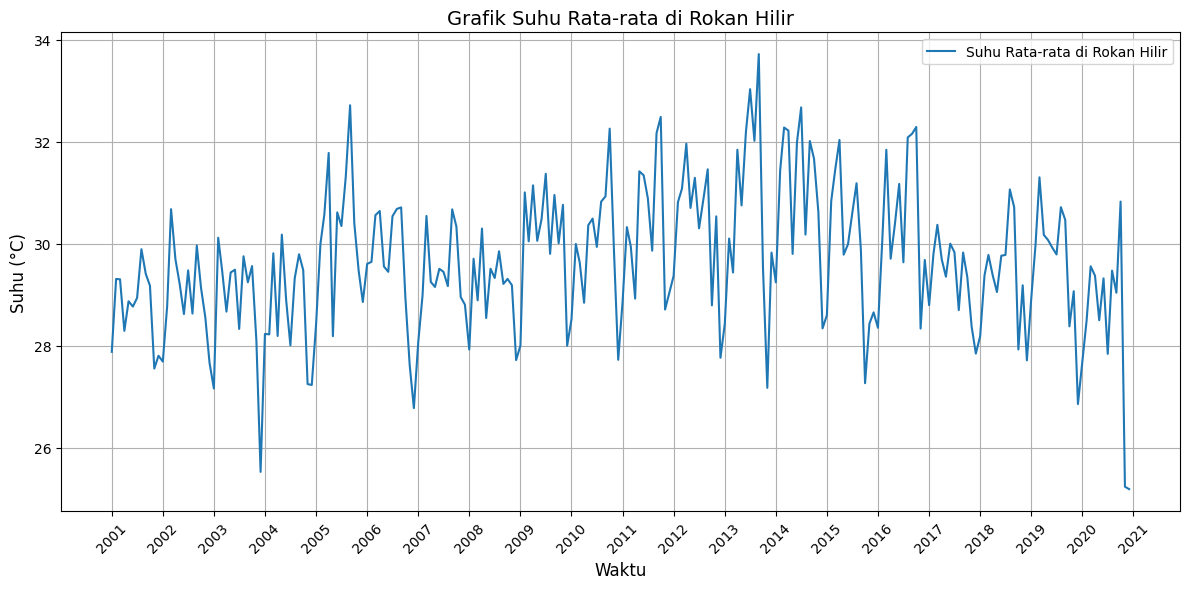

Hasil Uji ADF untuk Rokan Hulu:
Statistik ADF: -1.7231
p-value: 0.4192
------------------------------
Data suhu di Rokan Hulu adalah Tidak Stasioner.



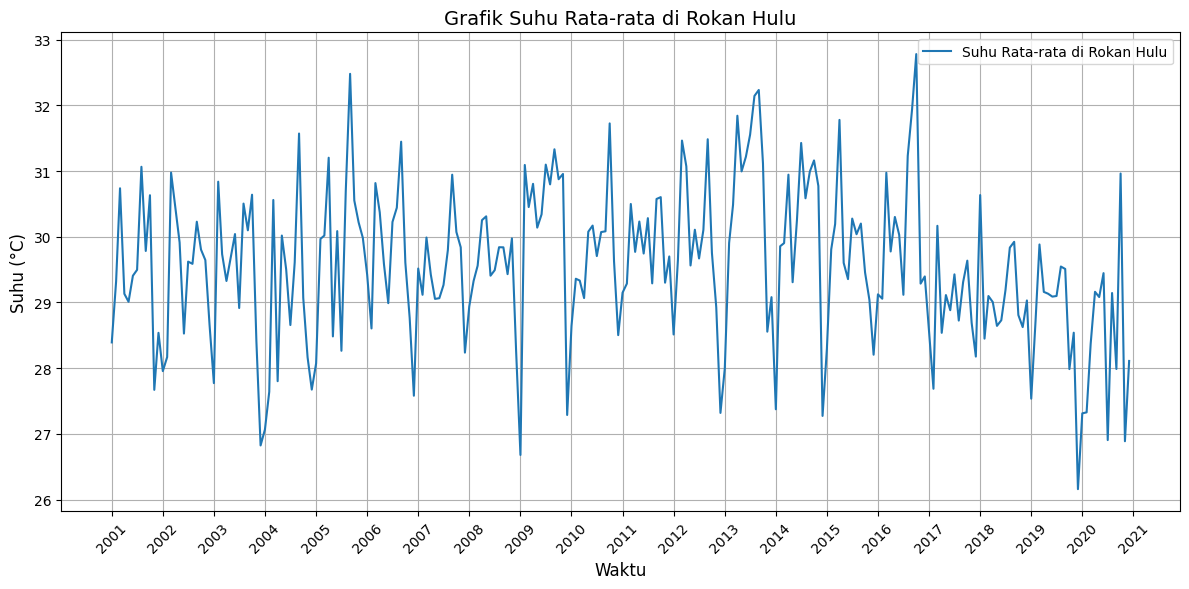

Hasil Uji ADF untuk Siak:
Statistik ADF: -1.7603
p-value: 0.4003
------------------------------
Data suhu di Siak adalah Tidak Stasioner.



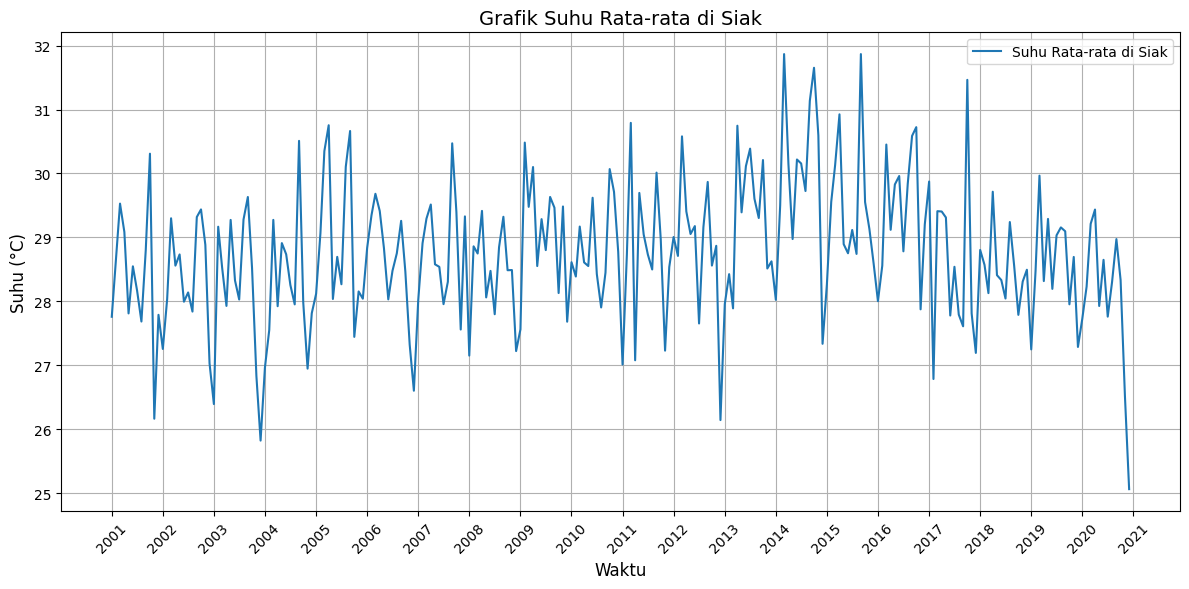

          Wilayah  Statistik ADF  p-value Stasioner / Tidak Stasioner
             Riau      -1.605289 0.480936             Tidak Stasioner
        Bengkalis      -1.690595 0.435965             Tidak Stasioner
  Indragiri Hilir      -2.191634 0.209296             Tidak Stasioner
   Indragiri Hulu      -1.561983 0.502657             Tidak Stasioner
           Kampar      -1.237105 0.657434             Tidak Stasioner
Kepulauan Meranti      -1.688801 0.436892             Tidak Stasioner
       Kota Dumai      -2.084027 0.250986             Tidak Stasioner
   Kota Pekanbaru      -2.633249 0.086318             Tidak Stasioner
 Kuantan Singingi      -1.684665 0.439030             Tidak Stasioner
        Pelalawan      -1.992964 0.289667             Tidak Stasioner
      Rokan Hilir      -1.854688 0.353668             Tidak Stasioner
       Rokan Hulu      -1.723144 0.419229             Tidak Stasioner
             Siak      -1.760336 0.400324             Tidak Stasioner


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import mdates for date formatting
from statsmodels.tsa.stattools import adfuller

# Path data yang diberikan
file_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau.xlsx'

# Membaca data dari Excel
df = pd.read_excel(file_path)

# Membuat kolom datetime dengan cara eksplisit
df['Date'] = pd.to_datetime(df['Tahun'].astype(str) + '-' + df['Bulan'].astype(str) + '-01')

# Menetapkan kolom Date sebagai indeks
df.set_index('Date', inplace=True)

# Menyiapkan kolom 'Kota/Kabupaten' dan data suhu rata-rata
kota_kabupaten = df['Kota/Kabupaten'].unique()

# Inisialisasi list untuk menyimpan hasil
results = []

# Fungsi untuk melakukan uji ADF dan plot data suhu setiap Kota/Kabupaten
def uji_stasioneritas(data, kota):
    # Handle missing or infinite values
    data = data.dropna() # Drop rows with missing values
    data = data.replace([np.inf, -np.inf], np.nan).dropna() # Replace infinite values with NaN and drop them

    # Uji ADF
    hasil_adf = adfuller(data)
    adf_statistic = hasil_adf[0]
    p_value = hasil_adf[1]
    stasioner = "Stasioner" if p_value < 0.05 else "Tidak Stasioner"

    # Simpan hasil ke dalam list
    results.append([kota, adf_statistic, p_value, stasioner])

    print(f'Hasil Uji ADF untuk {kota}:')
    print(f'Statistik ADF: {adf_statistic:.4f}')
    print(f'p-value: {p_value:.4f}')
    print('---'*10)
    print(f'Data suhu di {kota} adalah {stasioner}.\n')

    # Plot data suhu
    plt.figure(figsize=(12, 6))

    # Pengaturan sumbu x agar menampilkan tahun dengan benar
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Menampilkan tahun secara tahunan
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format tahun

    plt.plot(data, label=f'Suhu Rata-rata di {kota}')
    plt.title(f'Grafik Suhu Rata-rata di {kota}', fontsize=14)
    plt.xlabel('Waktu', fontsize=12)
    plt.ylabel('Suhu (°C)', fontsize=12)
    plt.grid(True)  # Menambahkan grid untuk memperjelas pola
    plt.legend()
    plt.xticks(rotation=45, fontsize=10)  # Memiringkan dan memperkecil label tahun agar lebih terbaca
    plt.tight_layout()
    plt.show()

# Melakukan uji stasioneritas untuk setiap Kota/Kabupaten
for kota in kota_kabupaten:
    data_kota = df[df['Kota/Kabupaten'] == kota]['Rata-rata Suhu (°C)']
    uji_stasioneritas(data_kota, kota)

# Membuat DataFrame dari hasil
results_df = pd.DataFrame(results, columns=['Wilayah', 'Statistik ADF', 'p-value', 'Stasioner / Tidak Stasioner'])

# Menampilkan tabel hasil
print(results_df.to_string(index=False))


In [ ]:
result_adf_awal

,Wilayah,Statistik ADF,p-value,Stasioner / Tidak Stasioner
0,Riau,-1.605289,0.480936,Tidak Stasioner
1,Bengkalis,-1.690595,0.435965,Tidak Stasioner
2,Indragiri Hilir,-2.191634,0.209296,Tidak Stasioner
3,Indragiri Hulu,-1.561983,0.502657,Tidak Stasioner
4,Kampar,-1.237105,0.657434,Tidak Stasioner
5,Kepulauan Meranti,-1.688801,0.436892,Tidak Stasioner
6,Kota Dumai,-2.084027,0.250986,Tidak Stasioner
7,Kota Pekanbaru,-2.633249,0.086318,Tidak Stasioner
8,Kuantan Singingi,-1.684665,0.439030,Tidak Stasioner
9,Pelalawan,-1.992964,0.289667,Tidak Stasioner


In [ ]:
import pandas as pd

# Ambil kota-kota yang tidak stasioner
kota_tidak_stasioner = result_adf_awal[result_adf_awal['Stasioner / Tidak Stasioner'] == 'Tidak Stasioner']['Wilayah']

# Fungsi untuk melakukan differencing pada data suhu
def apply_differencing(data):
    return data.diff().dropna()

# Dictionary untuk menyimpan data hasil differencing
differenced_data = {}

# Iterasi untuk setiap kota yang tidak stasioner
for kota in kota_tidak_stasioner:
    data_kota = df[df['Kota/Kabupaten'] == kota]['Rata-rata Suhu (°C)']
    differenced_data[kota] = apply_differencing(data_kota)

# Convert dictionary to DataFrame if needed
differenced_df = pd.DataFrame(differenced_data)

# Tampilkan hasil differencing
print(differenced_df)


                Riau  Bengkalis  Indragiri Hilir  Indragiri Hulu    Kampar  \
Date                                                                         
2001-02-01  1.146295   0.756202         1.557955        0.866947  1.254914   
2001-03-01  0.248788   0.531614        -0.961150       -0.015763  0.899720   
2001-04-01 -0.315938  -0.421835         1.145213       -0.390934 -0.772253   
2001-05-01 -0.746128  -0.645760        -1.501898       -0.504994 -0.957528   
2001-06-01  0.357091   0.827453         0.478094        0.553167 -0.023777   
...              ...        ...              ...             ...       ...   
2020-08-01  1.500562   1.642776         1.398665        1.054775  1.693880   
2020-09-01  0.036707  -0.243094         0.297696        0.763024 -0.563611   
2020-10-01  0.258972  -0.360201        -1.432608       -0.870753 -2.183255   
2020-11-01 -1.581255  -0.995088         1.304883        0.688109  0.703787   
2020-12-01 -0.359935  -2.133673        -1.326500       -0.966981

In [ ]:
differenced_df

,Riau,Bengkalis,Indragiri Hilir,Indragiri Hulu,Kampar,Kepulauan Meranti,Kota Dumai,Kota Pekanbaru,Kuantan Singingi,Pelalawan,Rokan Hilir,Rokan Hulu,Siak
Date,,,,,,,,,,,,,
2001-02-01,1.146295,0.756202,1.557955,0.866947,1.254914,-0.747061,1.075265,2.670021,1.563369,1.408146,1.430440,0.928376,0.923641
2001-03-01,0.248788,0.531614,-0.961150,-0.015763,0.899720,0.246807,-1.114306,-0.792050,0.047433,0.232695,-0.005830,1.416477,0.846770
2001-04-01,-0.315938,-0.421835,1.145213,-0.390934,-0.772253,0.096827,0.707553,0.128439,-0.603941,-0.073456,-1.012826,-1.605529,-0.443903
2001-05-01,-0.746128,-0.645760,-1.501898,-0.504994,-0.957528,-0.223463,0.120090,-1.669433,-0.773809,-1.167348,0.580805,-0.120785,-1.274040
2001-06-01,0.357091,0.827453,0.478094,0.553167,-0.023777,0.614139,0.642485,0.254919,0.262055,0.092914,-0.103967,0.395634,0.736713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,1.500562,1.642776,1.398665,1.054775,1.693880,1.336434,1.700284,0.302499,1.536124,1.724498,1.633850,2.237282,0.543342
2020-09-01,0.036707,-0.243094,0.297696,0.763024,-0.563611,-0.012089,0.057603,0.815734,1.102455,0.163932,-0.433922,-1.155863,0.670108
2020-10-01,0.258972,-0.360201,-1.432608,-0.870753,-2.183255,-1.123745,1.406176,-4.598724,0.362823,1.584994,1.789633,2.973686,-0.641152


In [ ]:
data_kota

,Rata-rata Suhu (°C)
Date,
2001-01-01,27.757637
2001-02-01,28.681278
2001-03-01,29.528048
2001-04-01,29.084145
2001-05-01,27.810105
...,...
2020-08-01,28.302988
2020-09-01,28.973096
2020-10-01,28.331944


In [ ]:
df[df['Kota/Kabupaten'] == kota]['Rata-rata Suhu (°C)']

,Rata-rata Suhu (°C)
Date,
2001-01-01,27.757637
2001-02-01,28.681278
2001-03-01,29.528048
2001-04-01,29.084145
2001-05-01,27.810105
...,...
2020-08-01,28.302988
2020-09-01,28.973096
2020-10-01,28.331944


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Misalkan differenced_df adalah DataFrame hasil differencing
# Fungsi untuk melakukan uji ADF pada setiap kolom
def perform_adf_test(series):
    result = adfuller(series.dropna(), autolag='AIC')
    return pd.Series({
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Lags Used': result[2],
        'Number of Observations': result[3],
        'Critical Value (1%)': result[4]['1%'],
        'Critical Value (5%)': result[4]['5%'],
        'Critical Value (10%)': result[4]['10%']
    })

# Terapkan uji ADF pada setiap kolom di differenced_df
adf_results = differenced_df.apply(perform_adf_test)

# Tampilkan hasil uji ADF
print(adf_results)


                              Riau     Bengkalis  Indragiri Hilir  \
ADF Statistic            -5.276388 -9.634162e+00    -5.848765e+00   
p-value                   0.000006  1.582894e-16     3.630820e-07   
Lags Used                13.000000  1.000000e+01     1.500000e+01   
Number of Observations  225.000000  2.280000e+02     2.230000e+02   
Critical Value (1%)      -3.459752 -3.459361e+00    -3.460019e+00   
Critical Value (5%)      -2.874473 -2.874302e+00    -2.874590e+00   
Critical Value (10%)     -2.573663 -2.573571e+00    -2.573725e+00   

                        Indragiri Hulu        Kampar  Kepulauan Meranti  \
ADF Statistic            -1.012474e+01 -6.006127e+00          -3.664677   
p-value                   9.245207e-18  1.613944e-07           0.004638   
Lags Used                 1.000000e+01  1.300000e+01          15.000000   
Number of Observations    2.280000e+02  2.250000e+02         223.000000   
Critical Value (1%)      -3.459361e+00 -3.459752e+00          -3.460019 

In [ ]:
adf_results

,Riau,Bengkalis,Indragiri Hilir,Indragiri Hulu,Kampar,Kepulauan Meranti,Kota Dumai,Kota Pekanbaru,Kuantan Singingi,Pelalawan,Rokan Hilir,Rokan Hulu,Siak
ADF Statistic,-5.276388,-9.634162e+00,-5.848765e+00,-1.012474e+01,-6.006127e+00,-3.664677,-9.003979e+00,-1.013810e+01,-6.335897e+00,-9.925032e+00,-5.153368,-7.035421e+00,-5.695018e+00
p-value,0.000006,1.582894e-16,3.630820e-07,9.245207e-18,1.613944e-07,0.004638,6.385021e-15,8.562613e-18,2.831315e-08,2.922274e-17,0.000011,6.033830e-10,7.910611e-07
Lags Used,13.000000,1.000000e+01,1.500000e+01,1.000000e+01,1.300000e+01,15.000000,1.100000e+01,1.100000e+01,1.300000e+01,1.100000e+01,13.000000,1.200000e+01,1.300000e+01
Number of Observations,225.000000,2.280000e+02,2.230000e+02,2.280000e+02,2.250000e+02,223.000000,2.270000e+02,2.230000e+02,2.250000e+02,2.270000e+02,225.000000,2.260000e+02,2.250000e+02
Critical Value (1%),-3.459752,-3.459361e+00,-3.460019e+00,-3.459361e+00,-3.459752e+00,-3.460019,-3.459490e+00,-3.460019e+00,-3.459752e+00,-3.459490e+00,-3.459752,-3.459620e+00,-3.459752e+00
Critical Value (5%),-2.874473,-2.874302e+00,-2.874590e+00,-2.874302e+00,-2.874473e+00,-2.874590,-2.874358e+00,-2.874590e+00,-2.874473e+00,-2.874358e+00,-2.874473,-2.874415e+00,-2.874473e+00
Critical Value (10%),-2.573663,-2.573571e+00,-2.573725e+00,-2.573571e+00,-2.573663e+00,-2.573725,-2.573602e+00,-2.573725e+00,-2.573663e+00,-2.573602e+00,-2.573663,-2.573632e+00,-2.573663e+00


In [ ]:
import pandas as pd

# Menyusun data untuk tabel result_adf_diff
data_adf_diff = {
    'Wilayah': adf_results.columns,
    'ADF Statistic': adf_results.loc['ADF Statistic'],
    'p-value': adf_results.loc['p-value'],
    'Stasioner / Tidak Stasioner': adf_results.loc['p-value'] < 0.05
}

# Mengubah nilai boolean ke teks
data_adf_diff['Stasioner / Tidak Stasioner'] = data_adf_diff['Stasioner / Tidak Stasioner'].map({True: 'Stasioner', False: 'Tidak Stasioner'})

# Membuat DataFrame dari data_adf_diff
result_adf_diff = pd.DataFrame(data_adf_diff)

# Mengatur ulang urutan kolom untuk hasil akhir
result_adf_diff = result_adf_diff[['Wilayah', 'ADF Statistic', 'p-value', 'Stasioner / Tidak Stasioner']]

# Menampilkan tabel hasil uji ADF setelah differencing
result_adf_diff


,Wilayah,ADF Statistic,p-value,Stasioner / Tidak Stasioner
Riau,Riau,-5.276388,6.127225e-06,Stasioner
Bengkalis,Bengkalis,-9.634162,1.582894e-16,Stasioner
Indragiri Hilir,Indragiri Hilir,-5.848765,3.630820e-07,Stasioner
Indragiri Hulu,Indragiri Hulu,-10.124738,9.245207e-18,Stasioner
Kampar,Kampar,-6.006127,1.613944e-07,Stasioner
Kepulauan Meranti,Kepulauan Meranti,-3.664677,4.638344e-03,Stasioner
Kota Dumai,Kota Dumai,-9.003979,6.385021e-15,Stasioner
Kota Pekanbaru,Kota Pekanbaru,-10.138100,8.562613e-18,Stasioner
Kuantan Singingi,Kuantan Singingi,-6.335897,2.831315e-08,Stasioner
Pelalawan,Pelalawan,-9.925032,2.922274e-17,Stasioner


In [ ]:
result_adf_diff

,Wilayah,ADF Statistic,p-value,Stasioner / Tidak Stasioner
Riau,Riau,-5.276388,6.127225e-06,Stasioner
Bengkalis,Bengkalis,-9.634162,1.582894e-16,Stasioner
Indragiri Hilir,Indragiri Hilir,-5.848765,3.630820e-07,Stasioner
Indragiri Hulu,Indragiri Hulu,-10.124738,9.245207e-18,Stasioner
Kampar,Kampar,-6.006127,1.613944e-07,Stasioner
Kepulauan Meranti,Kepulauan Meranti,-3.664677,4.638344e-03,Stasioner
Kota Dumai,Kota Dumai,-9.003979,6.385021e-15,Stasioner
Kota Pekanbaru,Kota Pekanbaru,-10.138100,8.562613e-18,Stasioner
Kuantan Singingi,Kuantan Singingi,-6.335897,2.831315e-08,Stasioner
Pelalawan,Pelalawan,-9.925032,2.922274e-17,Stasioner


In [ ]:
import pandas as pd

# Misalkan adf_results adalah DataFrame hasil uji ADF
# Struktur adf_results seperti yang Anda berikan
data_adf_results = {
    'Riau': [-5.276388, 0.000006],
    'Bengkalis': [-9.634162, 1.582894e-16],
    'Indragiri Hilir': [-5.848765, 3.630820e-07],
    'Indragiri Hulu': [-10.124738, 9.245207e-18],
    'Kampar': [-6.006127, 1.613944e-07],
    'Kepulauan Meranti': [-3.664677, 4.638344e-03],
    'Kota Dumai': [-9.003979, 6.385021e-15],
    'Kota Pekanbaru': [-10.138100, 8.562613e-18],
    'Kuantan Singingi': [-6.335897, 2.831315e-08],
    'Pelalawan': [-9.925032, 2.922274e-17],
    'Rokan Hilir': [-5.153368, 1.093862e-05],
    'Rokan Hulu': [-7.035421, 6.033830e-10],
    'Siak': [-5.695018, 7.910611e-07]
}

# Membuat DataFrame dari data_adf_results
adf_results = pd.DataFrame(data_adf_results, index=['ADF Statistic', 'p-value'])

# Menyusun data untuk tabel result_adf_diff
data_adf_diff = {
    'Wilayah': adf_results.columns,
    'ADF Statistic': adf_results.loc['ADF Statistic'],
    'p-value': adf_results.loc['p-value'],
    'Stasioner / Tidak Stasioner': ['Stasioner' if p < 0.05 else 'Tidak Stasioner' for p in adf_results.loc['p-value']]
}

# Membuat DataFrame dari data_adf_diff
result_adf_diff = pd.DataFrame(data_adf_diff)

# Menampilkan tabel hasil uji ADF setelah differencing
result_adf_diff


,Wilayah,ADF Statistic,p-value,Stasioner / Tidak Stasioner
Riau,Riau,-5.276388,6.000000e-06,Stasioner
Bengkalis,Bengkalis,-9.634162,1.582894e-16,Stasioner
Indragiri Hilir,Indragiri Hilir,-5.848765,3.630820e-07,Stasioner
Indragiri Hulu,Indragiri Hulu,-10.124738,9.245207e-18,Stasioner
Kampar,Kampar,-6.006127,1.613944e-07,Stasioner
Kepulauan Meranti,Kepulauan Meranti,-3.664677,4.638344e-03,Stasioner
Kota Dumai,Kota Dumai,-9.003979,6.385021e-15,Stasioner
Kota Pekanbaru,Kota Pekanbaru,-10.138100,8.562613e-18,Stasioner
Kuantan Singingi,Kuantan Singingi,-6.335897,2.831315e-08,Stasioner
Pelalawan,Pelalawan,-9.925032,2.922274e-17,Stasioner


In [ ]:
import pandas as pd

# Data yang benar dari adf_results
data_adf_results = {
    'Wilayah': ['Riau', 'Bengkalis', 'Indragiri Hilir', 'Indragiri Hulu', 'Kampar', 'Kepulauan Meranti', 'Kota Dumai', 'Kota Pekanbaru', 'Kuantan Singingi', 'Pelalawan', 'Rokan Hilir', 'Rokan Hulu', 'Siak'],
    'ADF Statistic': [-5.276388, -9.634162, -5.848765, -10.124738, -6.006127, -3.664677, -9.003979, -10.138100, -6.335897, -9.925032, -5.153368, -7.035421, -5.695018],
    'p-value': [6.127225e-06, 1.582894e-16, 3.630820e-07, 9.245207e-18, 1.613944e-07, 4.638344e-03, 6.385021e-15, 8.562613e-18, 2.831315e-08, 2.922274e-17, 1.093862e-05, 6.033830e-10, 7.910611e-07]
}

# Membuat DataFrame dari data_adf_results
adf_results = pd.DataFrame(data_adf_results)

# Menyusun data untuk tabel result_adf_diff
data_adf_diff = {
    'Wilayah': adf_results['Wilayah'],
    'ADF Statistic': adf_results['ADF Statistic'],
    'p-value': adf_results['p-value'],
    'Stasioner / Tidak Stasioner': ['Stasioner' if p < 0.05 else 'Tidak Stasioner' for p in adf_results['p-value']]
}

# Membuat DataFrame dari data_adf_diff
result_adf_diff = pd.DataFrame(data_adf_diff)

# Menampilkan tabel hasil uji ADF setelah differencing
result_adf_diff


,Wilayah,ADF Statistic,p-value,Stasioner / Tidak Stasioner
0,Riau,-5.276388,6.127225e-06,Stasioner
1,Bengkalis,-9.634162,1.582894e-16,Stasioner
2,Indragiri Hilir,-5.848765,3.630820e-07,Stasioner
3,Indragiri Hulu,-10.124738,9.245207e-18,Stasioner
4,Kampar,-6.006127,1.613944e-07,Stasioner
5,Kepulauan Meranti,-3.664677,4.638344e-03,Stasioner
6,Kota Dumai,-9.003979,6.385021e-15,Stasioner
7,Kota Pekanbaru,-10.138100,8.562613e-18,Stasioner
8,Kuantan Singingi,-6.335897,2.831315e-08,Stasioner
9,Pelalawan,-9.925032,2.922274e-17,Stasioner


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller

# Path data yang diberikan
data_path = '/content/drive/MyDrive/data hasil Citra ke Numerik/Suhu_Permukaan_Riau.xlsx'

# Membaca data dari Excel
data_frame = pd.read_excel(data_path)

# Membuat kolom datetime dengan cara eksplisit
data_frame['Tanggal'] = pd.to_datetime(data_frame['Tahun'].astype(str) + '-' + data_frame['Bulan'].astype(str) + '-01')

# Menetapkan kolom Tanggal sebagai indeks
data_frame.set_index('Tanggal', inplace=True)

# Menyiapkan kolom 'Kota/Kabupaten' dan data suhu rata-rata
regions = data_frame['Kota/Kabupaten'].unique()

# Inisialisasi list untuk menyimpan hasil
results_list = []

# Fungsi untuk melakukan uji ADF
def perform_adf_test(series):
    series = series.dropna().replace([np.inf, -np.inf], np.nan).dropna()
    adf_result = adfuller(series)
    statistic = adf_result[0]
    p_value = adf_result[1]
    stationary = "Stationary" if p_value < 0.05 else "Non-Stationary"
    return statistic, p_value, stationary

# Fungsi untuk melakukan differencing
def apply_differencing(series, d):
    for _ in range(d):
        series = series.diff().dropna()
    return series

# Fungsi untuk membuat grafik
def plot_before_after(original_data, differenced_data, region):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(original_data, label=f'Average Temperature in {region}', color='blue')
    plt.title(f'Before Differencing\n{len(original_data)} data points', fontsize=12)
    plt.xlabel('Time', fontsize=10)
    plt.ylabel('Temperature (°C)', fontsize=10)
    plt.grid(True)
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45, fontsize=8)

    plt.subplot(1, 2, 2)
    plt.plot(differenced_data, label=f'Average Temperature in {region}', color='green')
    plt.title(f'After Differencing\n{len(differenced_data)} data points', fontsize=12)
    plt.xlabel('Time', fontsize=10)
    plt.ylabel('Temperature (°C)', fontsize=10)
    plt.grid(True)
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45, fontsize=8)

    plt.tight_layout()
    plt.show()

# Melakukan uji stasioneritas dan differencing untuk setiap Kota/Kabupaten
for region in regions:
    temp_data = data_frame[data_frame['Kota/Kabupaten'] == region]['Rata-rata Suhu (°C)']

    # Simpan data sebelum differencing
    temp_data_before = temp_data.copy()

    # Uji stasioneritas awal (sebelum differencing)
    adf_stat_before, p_val_before, stationary_before = perform_adf_test(temp_data)

    # Inisialisasi variabel untuk jumlah differencing
    differencing_count = 0

    # Proses differencing jika data tidak stasioner
    while stationary_before == "Non-Stationary":
        differencing_count += 1
        temp_data = apply_differencing(temp_data, d=1)
        adf_stat_before, p_val_before, stationary_before = perform_adf_test(temp_data)

    # Simpan data setelah differencing
    temp_data_after = temp_data.copy()

    # Plot data suhu sebelum dan sesudah differencing
    plot_before_after(temp_data_before, temp_data_after, region)

    # Simpan hasil ke dalam list
    results_list.append([
        region,
        adf_stat_before,
        p_val_before,
        stationary_before,
        differencing_count,
        adf_stat_before,
        p_val_before,
        stationary_before
    ])

# Membuat DataFrame dari hasil
results_df = pd.DataFrame(results_list, columns=[
    'Region',
    'ADF Statistic Before Differencing',
    'p-value Before Differencing',
    'Stationary Status Before Differencing',
    'Number of Differencing Steps',
    'ADF Statistic After Differencing',
    'p-value After Differencing',
    'Stationary Status After Differencing'
])

# Menampilkan tabel hasil
print(results_df.to_string(index=False))


Output hidden; open in https://colab.research.google.com to view.